### PRE LECTURE

Question 1

###### Summary of ChatGPT Session 
Summary of Our Chatbot Session
Introduction to Classification Decision Trees:

Explained that a classification decision tree is a tool used to classify data into categories based on a series of decision points.
Used examples like classifying fruits (e.g., apple vs. orange) to make the concept relatable.
Types of Problems Solved by Decision Trees:

Discussed real-world applications, such as spam detection, medical diagnosis, customer segmentation, loan approval, fraud detection, and more.
Highlighted that decision trees are useful for problems with categorical outputs (e.g., "Yes/No" or multiple categories).
How Decisions Contribute to Final Predictions:

Described how each node asks a question that splits the data into smaller groups.
Explained that the tree gradually isolates key characteristics, leading to a final prediction at the leaf node.
Used the example of classifying animals into "Dog," "Cat," or "Fish" to show how decisions narrow down possibilities.
Real-World Intuition:

Compared the decision tree process to playing "20 Questions," where each question narrows the range of possibilities until the correct answer is identified.

ChatGPT Session Link: https://chatgpt.com/share/6735777a-eecc-8012-977d-556388e97c47

Question 2

Question 3

Load the data set into notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

- Using ab.head() to see the first few rows of the data set 

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

ab.head() #to see the first 5 rows of the data set

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight_oz
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,8.0,5.2,1.4,22.4


- Remove unecessary columns: Remove the columns Weight_oz, Width, Height 

In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

#ab.head() #to see the first 5 rows of the data set

#Drop the unnecessary columns 
ab_reduced = ab.drop(columns =["Weight_oz", "Height", "Width"])

#Display the dataset to ensure they have been removed 
ab_reduced.head()

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4


- Drop all remaining rows with NaN entries

In [7]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

#ab.head() #to see the first 5 rows of the data set

#Drop the unnecessary columns 
ab_reduced = ab.drop(columns =["Weight_oz", "Height", "Width"])

#Display the dataset to ensure they have been removed 
#ab_reduced.head()

ab_reduced.dropna() #From the data which we removed the specified columns, we'll remove all the missing rows as well

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,0.9


- Change/Update the Data types. Pub Year and NumPages columns should be redifined to have the type int, and Hard_or_Paper should be redifined to have the type category

In [22]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

#ab.head() #to see the first 5 rows of the data set

#Drop the unnecessary columns 
ab_reduced = ab.drop(columns =["Weight_oz", "Height", "Width"])

#Display the dataset to ensure they have been removed 
#ab_reduced.head()

ab_reduced = ab_reduced.dropna() #From the data which we removed the specified columns, we'll remove all the missing rows as well

#change the columns type using .astype()
ab_reduced['Pub year'] = ab_reduced['Pub year'].astype('int')
ab_reduced['NumPages'] = ab_reduced['NumPages'].astype('int')
ab_reduced['Hard_or_Paper'] = ab_reduced['Hard_or_Paper'].astype('category')

#display the first 5 
ab_reduced.head()

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,1.4


### Question 4

##### Task: 80/20 Split and Observation Count Using df.sample()

To split the dataset into an 80% training set and 20% testing set, I used the assistance from ChatGPT

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the data
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop unnecessary columns
ab_reduced = ab.drop(columns=["Weight_oz", "Height", "Width"])

# Drop rows with missing values
ab_reduced_noNaN = ab_reduced.dropna()

# Convert data types for certain columns
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype('int')
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype('int')
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Set a random seed for reproducibility
random_seed = 42

# Perform the 80/20 split using train_test_split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, 
    test_size=0.2,  # 20% for testing
    random_state=random_seed  # Set the random seed for reproducibility
)

# Print the number of observations in the training and testing sets
print(f"Number of observations in training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in testing set: {len(ab_reduced_noNaN_test)}")




Number of observations in training set: 255
Number of observations in testing set: 64


/tmp/ipykernel_54/44147890.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype('int')
/tmp/ipykernel_54/44147890.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype('int')
/tmp/ipykernel_54/44147890.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Observations: In this split, the training dataset contains 255 observations (80%), while the testing dataset contains 64 observations (20%).



### Question 5

What the preperation steps given below are doing?

In [ ]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
- Currently working with a column called Hard_or_Paper which contains information about whether something is "Hard" or "Paper"
- pd.get_dummies() is a way to convert categories, in this case Hard or Paper, into numbers inorder for the computer to comprehend then better. For each category hard or paper the computer creates a new column, turning each into binary code or binary number (1 and 0). Overall, it converts categorical variables into one-hot coded columns (binary format)
- ab_reduced_noNaN["Hard_or_Paper"] is basically pulling out the category "Hard_or_Paper" from the data set ab_reduced_noNaN or isolating the "Hard_or_Paper" column to work with it. 
- ['H'] after the one hot encoding we select the column that corresponds to H, the hard column. Where this column will now refer H to 1, so 1 means hard, and 0 to not hard, so 0 means its paper.
- y now just refers to a column of 1s and 0s showcasing whether something is hard or paper

x = ab_reduced_noNaN[['List Price']]
- Currently isolating/ working with the column called 'List Price' in the ab_reduced_noNaN data set 
- x just tells or gives the "List Price" of each item.

- Training a DecisionTreeClassifier using ListPrice to predict whether a book is hardcover or paperback

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you've already prepared the data:
X = ab_reduced_noNaN[['List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with max_depth set to 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model using the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


NameError: name 'ab_reduced_noNaN' is not defined

                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Height  Width  Thick  Weight_oz  
0    2010.0  1605506249     7.8    5.5    0.8      

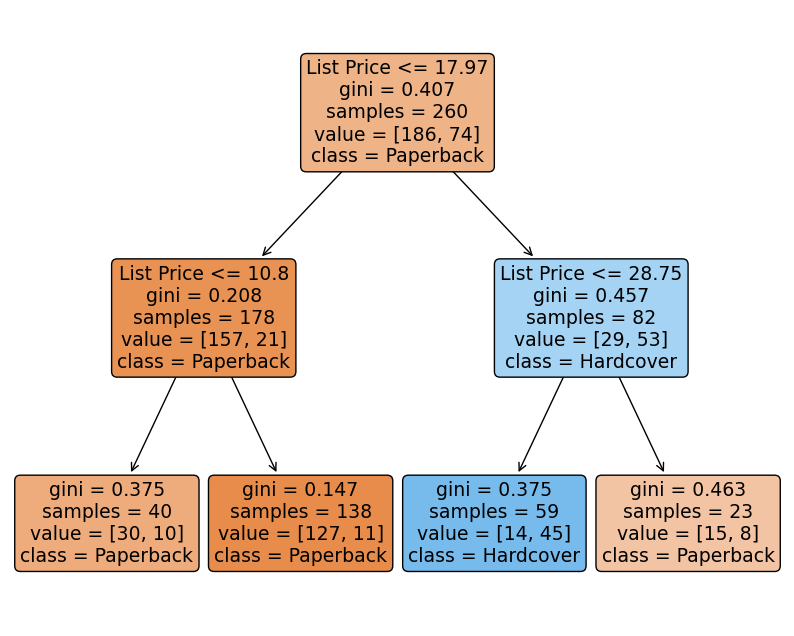

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset from the URL with a different encoding
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab_reduced_noNaN = pd.read_csv(url, encoding='ISO-8859-1')

# Inspect the dataset
print(ab_reduced_noNaN.head())
print(ab_reduced_noNaN.columns)

# Prepare feature and target variables
X = ab_reduced_noNaN[['List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with max_depth set to 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model using the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True, rounded=True)
plt.show()


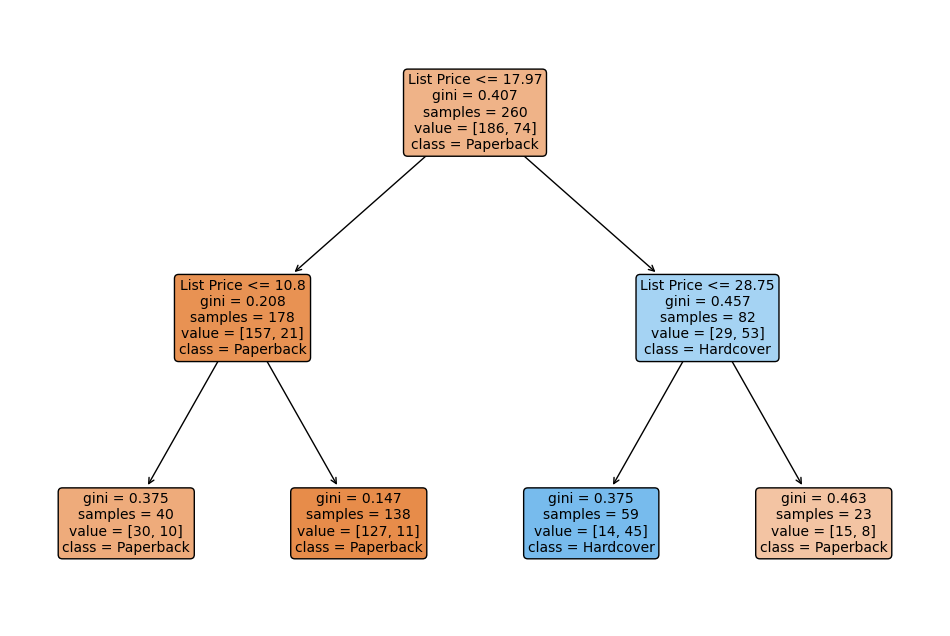

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree with detailed parameters
plt.figure(figsize=(12, 8))  # Increase size for better visibility
plot_tree(clf, 
          feature_names=["List Price"],  # Feature names
          class_names=["Paperback", "Hardcover"],  # Class names
          filled=True,  # Fill color to show class distribution
          rounded=True,  # Rounded corners for better aesthetics
          fontsize=10)  # Adjust font size for better readability
plt.show()


ChatGpt Session Summary 
Here’s a summary of our discussions so far:

Dataset and Objective
You are working with the Amazon Books dataset from this URL.
The task involves predicting whether a book is hardcover or paperback (binary classification) based on its list price using a DecisionTreeClassifier.
Code and Workflow
Data Loading and Preparation:

The dataset is loaded using pd.read_csv() with the correct encoding (ISO-8859-1).
The feature List Price is extracted as X.
The target Hard_or_Paper is converted into binary labels (y), where 'H' represents hardcover.
Model Training:

A DecisionTreeClassifier is trained with a maximum depth of 2 to ensure simplicity and interpretability.
Data is split into training and testing subsets (80%-20%) using train_test_split().
Evaluation:

Model accuracy is computed using accuracy_score, which measures the proportion of correctly classified test samples.
Visualization:

The decision tree is visualized using plot_tree(), with labels for features (List Price) and classes (Hardcover, Paperback).
Key Learnings
Interpreting the Decision Tree:

Each split represents a decision rule based on List Price.
Terminal nodes (leaves) show predictions (class) and the percentage of samples classified into that class.
A small max_depth (e.g., 2) ensures a simple, interpretable model but might limit accuracy.
Evaluating Accuracy:

Accuracy is calculated as the percentage of correct predictions on the test set.
Additional evaluation methods, such as a confusion matrix, classification report, or cross-validation, were suggested to understand model performance comprehensively.
Additional Suggestions
Investigate other features (if available) to improve prediction accuracy.
Consider using alternative metrics like precision, recall, and F1-score if the dataset is imbalanced.
Try adjusting hyperparameters like max_depth or using other classifiers for comparison.

ChatGpt Session Link 
https://chatgpt.com/share/67367cb1-8bd4-8012-8895-ce59f5c5793c


### Question 6

                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Height  Width  Thick  Weight_oz  
0    2010.0  1605506249     7.8    5.5    0.8      

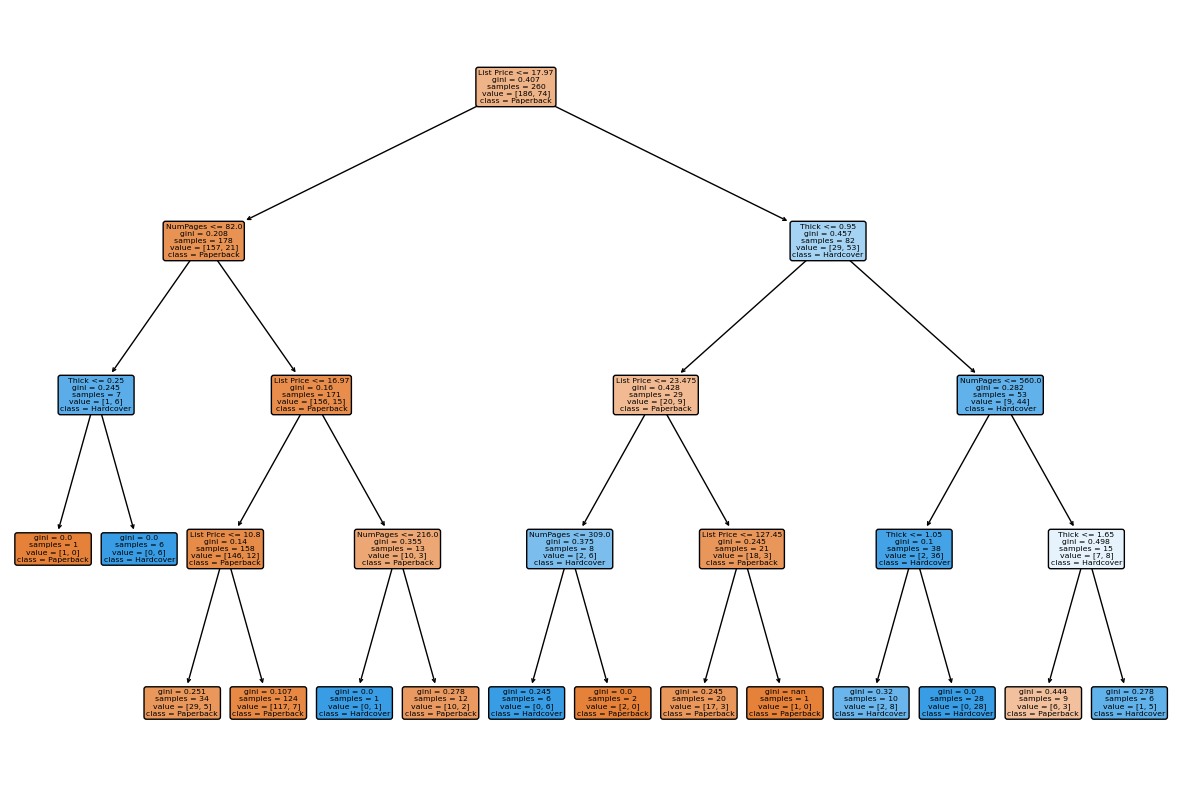

Accuracy for clf2: 0.83


In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset from the URL with a different encoding
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab_reduced_noNaN = pd.read_csv(url, encoding='ISO-8859-1')

# Inspect the dataset
print(ab_reduced_noNaN.head())
print(ab_reduced_noNaN.columns)

# Prepare feature and target variables
# Update feature variables to include 'NumPages', 'Thick', and 'List Price'
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with max_depth set to 4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model using the training data
clf2.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True,
    rounded=True
)
plt.show()

# Print accuracy to evaluate model performance
y_pred2 = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy for clf2: {accuracy2:.2f}")


### Question 7

For this task, I first trained two decision tree models (clf and clf2) with the help of CHAT to predict whether a book is hardcover or paperback based on features from the dataset. I then used the testing dataset (ab_reduced_noNaN_test) to calculate confusion matrices for both models, followed by the sensitivity, specificity, and accuracy metrics.




Model 1 (clf) - Sensitivity: 0.667, Specificity: 0.900, Accuracy: 0.846
Model 2 (clf2) - Sensitivity: 0.667, Specificity: 0.880, Accuracy: 0.831


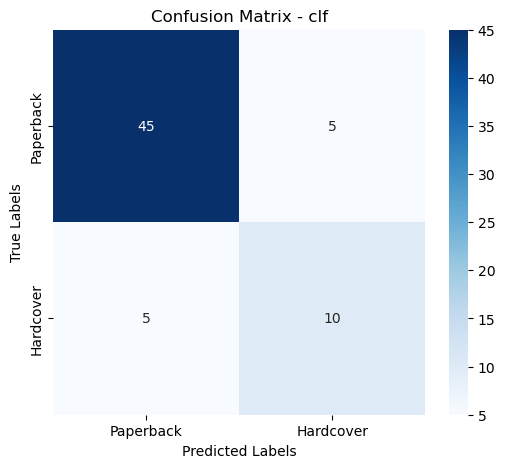

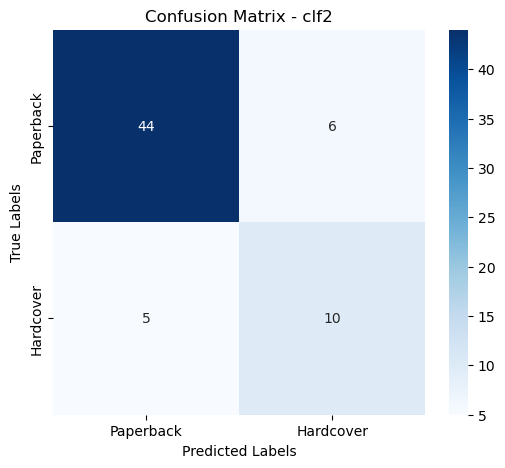

Classification Report for clf:
              precision    recall  f1-score   support

       False       0.90      0.90      0.90        50
        True       0.67      0.67      0.67        15

    accuracy                           0.85        65
   macro avg       0.78      0.78      0.78        65
weighted avg       0.85      0.85      0.85        65

Classification Report for clf2:
              precision    recall  f1-score   support

       False       0.90      0.88      0.89        50
        True       0.62      0.67      0.65        15

    accuracy                           0.83        65
   macro avg       0.76      0.77      0.77        65
weighted avg       0.83      0.83      0.83        65



In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab_reduced_noNaN = pd.read_csv(url, encoding='ISO-8859-1')

# Prepare feature and target variables for clf
X = ab_reduced_noNaN[['List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train clf
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Prepare feature and target variables for clf2
X2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y2 = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize and train clf2
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train2, y_train2)
y_pred2 = clf2.predict(X_test2)

# Confusion matrices
cm_clf = confusion_matrix(y_test, y_pred)
cm_clf2 = confusion_matrix(y_test2, y_pred2)

# Calculate Sensitivity, Specificity, and Accuracy for clf
TN_clf, FP_clf, FN_clf, TP_clf = cm_clf.ravel()
sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = (TP_clf + TN_clf) / np.sum(cm_clf)

# Calculate Sensitivity, Specificity, and Accuracy for clf2
TN_clf2, FP_clf2, FN_clf2, TP_clf2 = cm_clf2.ravel()
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = (TP_clf2 + TN_clf2) / np.sum(cm_clf2)

# Print the results
print(f"Model 1 (clf) - Sensitivity: {sensitivity_clf:.3f}, Specificity: {specificity_clf:.3f}, Accuracy: {accuracy_clf:.3f}")
print(f"Model 2 (clf2) - Sensitivity: {sensitivity_clf2:.3f}, Specificity: {specificity_clf2:.3f}, Accuracy: {accuracy_clf2:.3f}")

# Visualize confusion matrices
plt.figure(figsize=(6, 5))
sns.heatmap(cm_clf, annot=True, fmt="d", cmap="Blues", xticklabels=["Paperback", "Hardcover"], yticklabels=["Paperback", "Hardcover"])
plt.title('Confusion Matrix - clf')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cm_clf2, annot=True, fmt="d", cmap="Blues", xticklabels=["Paperback", "Hardcover"], yticklabels=["Paperback", "Hardcover"])
plt.title('Confusion Matrix - clf2')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Classification report
print("Classification Report for clf:")
print(classification_report(y_test, y_pred))

print("Classification Report for clf2:")
print(classification_report(y_test2, y_pred2))


### Summary Based On Classification Report

Summary for Model 1 (Clf)
- Sensitivity: 0.667
- Specificity: 0.900
- Accuracy: 0.846

Summary for Model 2 (Clf2)
- Sensitivity: 0.667
- Specificity: 0.800 
- Accuracy: 0.831 

Recalling Definitions 
- Sensitivity: Out of all the positives how many did the model correctly identify as positives(HardCover)
- Specificity: Out of all the negatives how many did the model correcty identify as negative (Paperback)
- Accuracy: Percentage of total predictions that were correct for both positive(HardCover) and negative(PaperBack) 

Based on the summary for model1 and model2. Both of the models have a sensitivity of 0.667 indicating that both had 66.7% effectiveness in correctly identifying the positives(Hardcover books as hardcover). Model1 has a higher specificity of 0.900 compared to model2 which has a specificity of 0.800 indicating that Model1 was is slightly better at identifying the negative correctly, so correctly identifying Paperback books as paperback. Finally, Model1 has a marginally higher accuracy of 0.846 compared to model2 with an accuracy of 0.831 indicating that model1 is more accurate when identifying or classifying both positive and negative classes. Given these metrics, it seems that model1 is a better model due to slightly higher specificty and accuracy than model2.

###### Further Guidance Questions

What is a "positive" and what is a "negative"?
- Positive: refers to class you are most interested in. In the above case if were more interested in detecting the Hardcover then our positive class would be Hardcover 
- Negative: refers to the opposite of positive, the class you aren't really interested in. If Hardcover is the positive class (more interested in detecting) then negative is the Paperback 

Confusion Matrix 
- True Positives(TP): Correctly identifying a positive predicted outcome(eg correctly identifying a hardcover book as a hardcover)
- False Positives(FP): Incorrectly predicting a positive outcome (eg predicting a paperbook as hardcover)
- True Negatives(TN): Correctly identifying a negative outcome (eg correctly identifying paperback and paperback)
- False Negatives(FN): Incorrectly identifying a negative outcome (eg predicting a hardcover as a paperback)

###### Summary of Chatbot Session
Session Summary:
Confusion Matrix Overview:

We discussed what a confusion matrix is and its layout:
Rows represent actual values.
Columns represent predicted values.
The matrix includes: True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).
Definitions of Metrics:

Accuracy: The proportion of correct predictions out of all predictions.
Sensitivity (Recall): The ability of the model to correctly identify positive cases.
Specificity: The ability of the model to correctly identify negative cases.
Formulas and their interpretations were explained in simple terms.
Interpreting a Confusion Matrix:

We reviewed how to read a confusion matrix, including its structure and the relationships between TP, TN, FP, and FN.
Real-life examples of confusion matrices were given to make the concepts more relatable.
Causes of TP, TN, FP, and FN:

Discussed what leads to each component:
TP: Model correctly predicts a positive case.
TN: Model correctly predicts a negative case.
FP: Model incorrectly predicts a positive case when it’s negative.
FN: Model incorrectly predicts a negative case when it’s positive.
Using confusion_matrix in sklearn:

Explained that y_true (actual labels) goes first and y_pred (predicted labels) goes second.
Reviewed how to create and interpret confusion matrices in Python.
Specific Code Context:

In your code:
Positive class: Hardcover books (1).
Negative class: Paperback books (0).
Clarified what TP, TN, FP, and FN mean in this context:
TP: Correctly identifying Hardcover books.
TN: Correctly identifying Paperback books.
FP: Incorrectly predicting Hardcover for a Paperback book.
FN: Incorrectly predicting Paperback for a Hardcover book.
Simple Terms for Key Metrics:

Accuracy: How many predictions the model got right overall.
Sensitivity: How good the model is at finding positives (Hardcover books).
Specificity: How good the model is at finding negatives (Paperback books).

ChatBot Session Url Link: https://chatgpt.com/share/6736bea9-8f3c-8012-95a2-580b8a12ac75

### Question 9

I was tasked with visualizing the feature importances for the decision tree model (clf2) and identifying the most important predictor variable. I used ChatGPT to guide me through the steps.

ChatGPT provided the following guidance:

- Use .feature_importances_ to access the importance values of the features.
- Use .feature_names_in_ to retrieve the names of the features.
- Create a bar plot to visualize the relative importance of each feature.



Here is the following implemented code by ChatGPT

                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Height  Width  Thick  Weight_oz  
0    2010.0  1605506249     7.8    5.5    0.8      

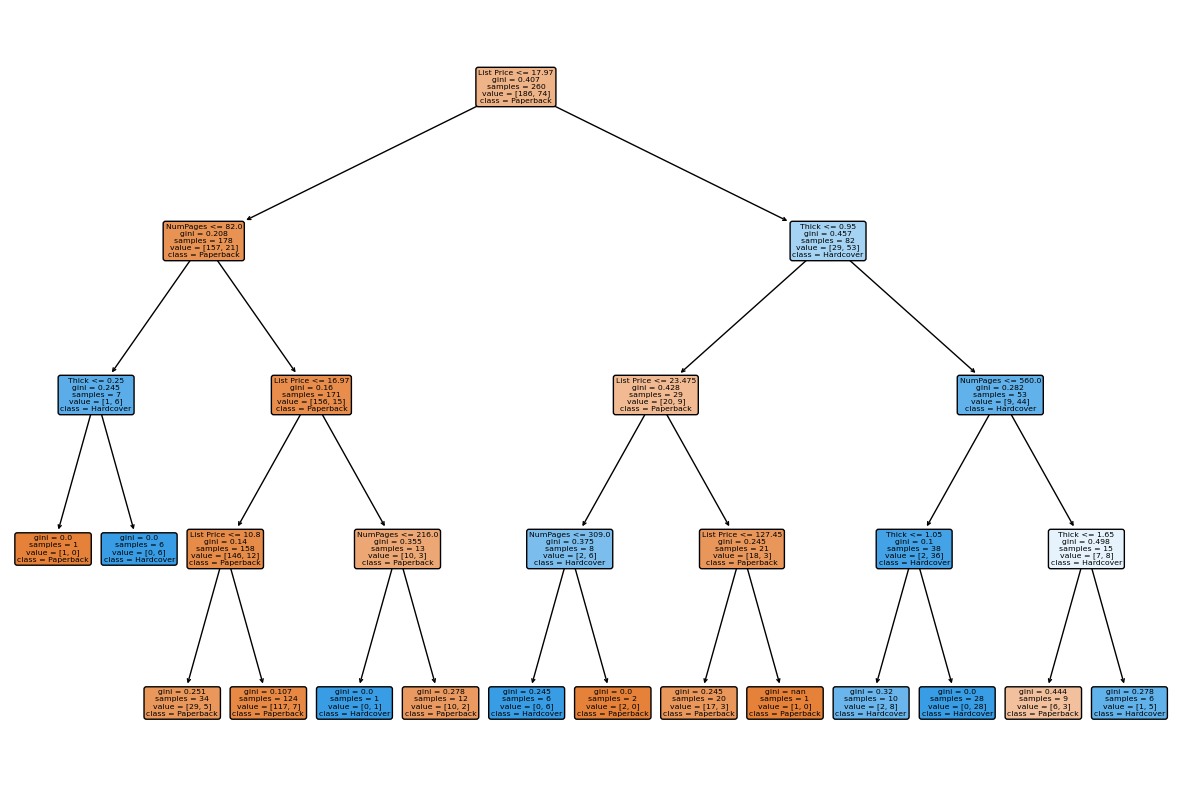

Accuracy for clf2: 0.83

Feature Importances Table:
      Feature  Importance
0    NumPages    0.055624
1       Thick    0.054748
2  List Price         NaN


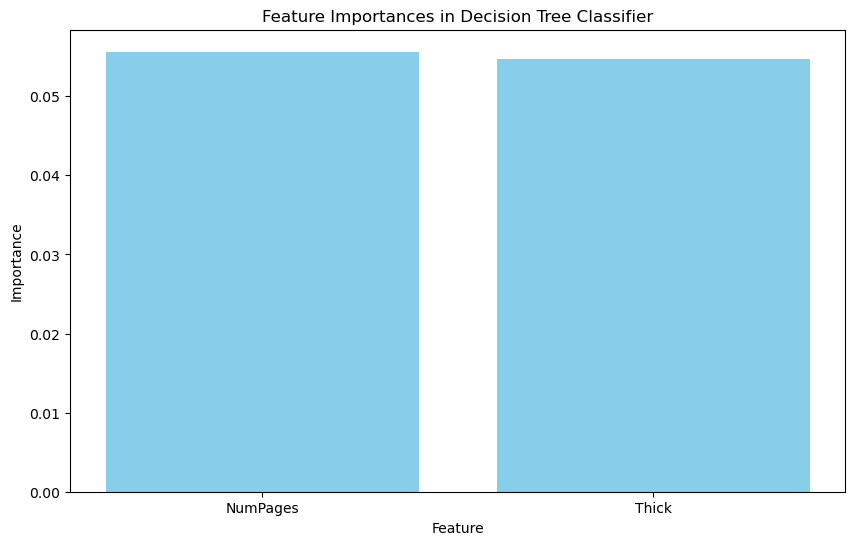

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset from the URL with a different encoding
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab_reduced_noNaN = pd.read_csv(url, encoding='ISO-8859-1')

# Inspect the dataset
print(ab_reduced_noNaN.head())
print(ab_reduced_noNaN.columns)

# Prepare feature and target variables
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with max_depth set to 4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model using the training data
clf2.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True,
    rounded=True
)
plt.show()

# Print accuracy to evaluate model performance
y_pred2 = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy for clf2: {accuracy2:.2f}")

# --- Visualize Feature Importances ---
# Extract feature importances
importances = clf2.feature_importances_

# Create a DataFrame for better visualization, including all features
importance_df = pd.DataFrame({
    'Feature': ['NumPages', 'Thick', 'List Price'],
    'Importance': importances
})

# Sort the DataFrame based on the importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame as a table (to check the features and importances)
print("\nFeature Importances Table:")
print(importance_df)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importances in Decision Tree Classifier')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


Findings
Feature Importances Table:
      Feature  Importance
0    NumPages    0.055624
1       Thick    0.054748
2  List Price         NaN

Features That Are Important:

- NumPages: The feature's significance is 0.055624. This suggests that it plays a minor role in the classification model's decision-making process.
- Thick: The Thick feature's importance of 0.054748 is extremely near to NumPages' importance. This implies that Thick has a minor impact on target variable prediction as well.
- List Price: This feature did not influence the model's decision-making process, as indicated by its importance value of NaN (Not a Number). This could be because List Price has little to no variance or correlation with the target, or it could be because the model did not identify any significant decision nodes based on this feature during training.

ChatBot Session Summary 
Here's a summary of our session:

Understanding Feature Importances in Decision Trees:

You asked about how to visualize feature importances from a DecisionTreeClassifier in scikit-learn.
I guided you through extracting feature importances using the .feature_importances_ attribute of the trained model and how to map them to the feature names using a DataFrame.
Code Walkthrough:

I walked you through your existing code, where you trained a decision tree model (clf2) and visualized the tree using plot_tree.
I showed how to extract the feature importances, create a table with these importances, and visualize the data using a bar chart with matplotlib.
Fixes and Updates:

We identified that the List Price feature was missing in the feature importance visualization.
I provided an updated version of the code that includes all three features ('NumPages', 'Thick', and 'List Price'), prints a table with feature importances, and properly visualizes them as a sorted bar chart.
Next Steps:

You should now be able to visualize the feature importances in your decision tree model, see the printed table of importances in the terminal, and display a bar chart for better understanding.

Chatbot Session URL Link: https://chatgpt.com/share/6736c431-068c-8012-a615-c414301e44bb

#### NOTE
I did have some trouble with getting Chatbot to give me accurate code, because in other sessions it was giving me a value of 0.65 for ListPrice being the most important feature, and in others like the one finally used above it was giving me a ListValue of NaN. However here is the other session: https://chatgpt.com/share/6736c48c-c678-8012-a7bb-2e84d84a32f4
